In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import math
import cv2
import numpy as np
import pandas as pd
import nibabel as nib
import os
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


device = 'cuda'

In [7]:
import torch
# from model_VAE import VAE
# from model_AE import AE
import nibabel as ni
from scipy.ndimage import zoom
import cv2

In [8]:
def preprocess(input_path):
    
    img_size=(137, 128, 128)
    image = ni.load(input_path)
    image = np.array(image.dataobj)
    image = np.moveaxis(image, [0, 1], [1, 0])
    img_scale = tuple([img_size[i]/image.shape[i] for i in range(len(image.shape))])
    image = zoom(image, img_scale)
    image = torch.from_numpy(image)
    image = image.unsqueeze(0).unsqueeze(0)
    image = image.to(device)
    
    return image

def reconstruction(input_path, model, output_path):
    image = preprocess(input_path)
    out = model_AE(image)
    volume = out[0]
    volume = volume.squeeze(0).squeeze(0)
    volume = volume.cpu().detach().numpy()
    
    
    fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
    out = cv2.VideoWriter(output_path, fourcc, 10, (128, 128))

    for i in range(volume.shape[0]):

        slice_img = volume[i,...]

        #new step
#         slice_img = (img[:, i, :] - np.min(img[:, i, :])) / (np.max(img[:, i, :]) - np.min(img[:, i, :])) * 255
#         slice_img = (slice_img[:, :] - np.min(slice_img[:, :])) / (np.max(slice_img[:, :]) - np.min(slice_img[:, :])) * 255
        slice_img = slice_img.astype(np.uint8)
        slice_img_bgr = cv2.cvtColor(slice_img, cv2.COLOR_GRAY2BGR)

        
        #previous step
        #slice_img_bgr = cv2.cvtColor(slice_img, cv2.COLOR_GRAY2BGR)*255.0
        #slice_img_bgr = np.uint8(slice_img_bgr)
        
        out.write(slice_img_bgr)

    out.release()
    


In [9]:
# ckpt_path_VAE = './checkpoint/best_model.pt' 
# ckpt_path_AE = './checkpoint/best_model_AE.pt'
ckpt_path_AE = './checkpoint/best_model_AE_l1_loss.pt'
ckpt_path_VAE = './checkpoint/best_model_vae_l1.pt'

# model_AE = AE.load(torch.load(ckpt_path_AE))
# model_VAE = VAE.load_state_dict(torch.load(ckpt_path_VAE))
model_AE = torch.load(ckpt_path_AE).to(device)

model_VAE = torch.load(ckpt_path_VAE).to(device)
# model_VAE.to(device)

In [10]:
input_path = 'dataset/images/smwp10034_T1.nii'

output_path = 'reconstruction/l1_VAE_out_norm_smwp10034_T1.mp4'
reconstruction(input_path, model_VAE, output_path)

OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


In [11]:
input_path = 'dataset/images/smwp10034_T1.nii'

output_path = 'reconstruction/l1_AE_out_norm_smwp10034_T1.mp4'
reconstruction(input_path, model_AE, output_path)

OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


In [5]:
img_path = 'dataset/images/smwp10114_T1.nii'
img_size=(137, 128, 128)

image = ni.load(img_path)
image = np.array(image.dataobj)
image = np.moveaxis(image, [0, 1], [1, 0])
img_scale = tuple([img_size[i]/image.shape[i] for i in range(len(image.shape))])
image = zoom(image, img_scale)
image = torch.from_numpy(image)
image = image.unsqueeze(0).unsqueeze(0)
image = image.to(device)

In [6]:
AE_out = model_AE(image)

In [8]:
print(len(AE_out))
print(AE_out[1].shape)

2
torch.Size([1, 512])


In [25]:
volume = AE_out[0]

In [32]:
volume = volume.squeeze(0).squeeze(0)
volume = volume.cpu().detach().numpy()

In [48]:
outpath = 'reconstruction/AE_out.mp4'
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
out = cv2.VideoWriter(outpath, fourcc, 10, (128, 128))

for i in range(volume.shape[0]):
    
    slice_img = volume[i,...]
    #slice_img = np.uint8(slice_img)
    slice_img_bgr = cv2.cvtColor(slice_img, cv2.COLOR_GRAY2BGR)*255.0
    slice_img_bgr = np.uint8(slice_img_bgr)
    out.write(slice_img_bgr)

out.release()

OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


0.12862092

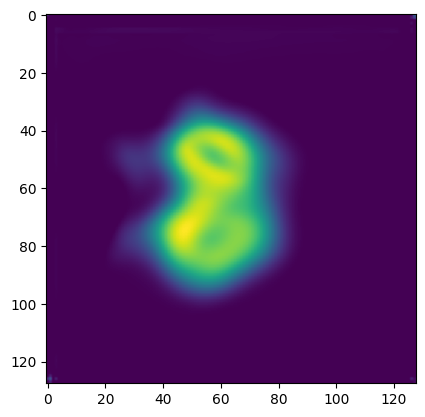

In [39]:
plt.imshow(volume[15,...])